#### Import relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Data

##### Sources: 
- https://www.kaggle.com/gsutters/the-human-freedom-index/version/2#_=_
- Wimmer and Min (2006) – “From empire to nation-state: Explaining war in the modern world, 1816-2001”, American Sociological Review 71(6):867-897, 2006.

In [13]:
hf_df = pd.read_csv('../data/human_freedom.csv')
hf_mean_df = pd.read_csv('../data/human_freedom_mean_score.csv')
colonies_df = pd.read_csv('../data/temp.csv', sep=';')

### Viewing the data

In [14]:
hf_df.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.241402,57.0,2.0


In [15]:
hf_mean_df.head()

,ISO_code,countries,region,hf_score
0,AGO,Angola,Sub-Saharan Africa,5.499577
1,ALB,Albania,Eastern Europe,7.522911
2,ARE,United Arab Emirates,Middle East & North Africa,6.441008
3,ARG,Argentina,Latin America & the Caribbean,6.677056
4,ARM,Armenia,Caucasus & Central Asia,7.413269


In [16]:
colonies_df.head()

,country,imppower
0,Canada,United Kingdom
1,Cuba,Spain
2,Cuba,USA
3,Haiti,USA
4,Dominican Rep.,Spain


### How many countries have colonized the country?

In [17]:
colonies_df['country'].value_counts()

Eritrea                   5
Yemen, Rep.               4
Tunisia                   3
Bosnia and Herzegovina    3
Slovak Rep.               3
Syria                     3
Somalia                   3
Dominican Rep.            3
Croatia                   3
Cameroon                  2
Qatar                     2
Tanzania                  2
Togo                      2
Laos                      2
Uruguay                   2
Philippines               2
Namibia                   2
Venezuela                 2
Ghana                     2
Burundi                   2
Lebanon                   2
Cyprus                    2
Pap. New Guinea           2
Panama                    2
Israel                    2
Poland                    2
Moldova                   2
Hungary                   2
Peru                      2
Chad                      2
Equatorial Guinea         2
Armenia                   2
Cuba                      2
Sudan                     2
Iraq                      2
Belgium             

### Which countries are the colonizers?

In [45]:
unique_colonizers = colonies_df['imppower'].unique()
unique_colonizers

array(['United Kingdom', 'Spain', 'USA', 'Haiti', 'Colombia',
       'Netherlands', 'Bolivia', 'Portugal', 'Brazil', 'Germany',
       'MIXED RULE', 'Austria-Hungary', 'Russia', 'Czechoslovakia',
       'Turkey', 'Yugoslavia', 'Sweden', 'Denmark', 'France', 'Sudan',
       'Belgium', 'Egypt', 'Italy', 'Ethiopia', 'South Africa', 'China',
       'Korea', 'Japan', 'Pakistan', 'Thailand', 'Australia'],
      dtype=object)

### How many countries have the colonizers colinized?

In [38]:
colonies_df['imppower'].value_counts()

United Kingdom     36
France             22
Spain              18
Turkey             17
Russia             16
MIXED RULE         12
Germany            10
Austria-Hungary     8
Portugal            5
Yugoslavia          4
Egypt               4
USA                 4
Belgium             3
Netherlands         3
China               2
Czechoslovakia      2
Colombia            2
Japan               2
Korea               2
Ethiopia            1
Haiti               1
South Africa        1
Italy               1
Sweden              1
Brazil              1
Denmark             1
Australia           1
Pakistan            1
Sudan               1
Bolivia             1
Thailand            1
Name: imppower, dtype: int64

### Merging the df with hf mean scores and colonizers

In [46]:
hf_mean_colonies_df = hf_mean_df.merge(colonies_df, left_on='countries', right_on='country').drop('country', axis=1)
hf_mean_colonies_df

,ISO_code,countries,region,hf_score,imppower
0,AGO,Angola,Sub-Saharan Africa,5.499577,Portugal
1,ALB,Albania,Eastern Europe,7.522911,Turkey
2,ARM,Armenia,Caucasus & Central Asia,7.413269,MIXED RULE
3,ARM,Armenia,Caucasus & Central Asia,7.413269,Russia
4,AUS,Australia,Oceania,8.613201,United Kingdom
5,AUT,Austria,Western Europe,8.424141,Germany
6,AZE,Azerbaijan,Caucasus & Central Asia,6.153984,Russia
7,BDI,Burundi,Sub-Saharan Africa,5.612288,Germany
8,BDI,Burundi,Sub-Saharan Africa,5.612288,Belgium
9,BEL,Belgium,Western Europe,8.227984,Netherlands


### Merging the df with hf score and colonizers

In [47]:
hf_colonies_df = hf_df.merge(colonies_df, left_on='countries', right_on='country').drop('country', axis=1)
hf_colonies_df

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,imppower
0,2016,ALB,Albania,Eastern Europe,7.568140,48.0,2.0,Turkey
1,2015,ALB,Albania,Eastern Europe,7.558539,49.0,2.0,Turkey
2,2014,ALB,Albania,Eastern Europe,7.615083,47.0,2.0,Turkey
3,2013,ALB,Albania,Eastern Europe,7.389597,53.0,2.0,Turkey
4,2012,ALB,Albania,Eastern Europe,7.435191,54.0,2.0,Turkey
5,2011,ALB,Albania,Eastern Europe,7.502044,53.0,2.0,Turkey
6,2010,ALB,Albania,Eastern Europe,7.553625,49.0,2.0,Turkey
7,2009,ALB,Albania,Eastern Europe,7.585134,46.0,2.0,Turkey
8,2008,ALB,Albania,Eastern Europe,7.498849,49.0,2.0,Turkey
9,2016,DZA,Algeria,Middle East & North Africa,5.135886,155.0,4.0,France


### Getting data for countries whose colonizers have colonized more than one country

##### Getting list of colonizers who have colonized more than 1 country

In [163]:
colonies_count = hf_mean_colonies_df[hf_mean_colonies_df['imppower'] != 'MIXED RULE'].groupby(['imppower']).size().reset_index().rename(columns={0:'count'})
multiple_colonies = list(colonies_count.loc[colonies_count['count'] > 1].sort_values('count')['imppower'])
multiple_colonies 

['China',
 'Colombia',
 'Czechoslovakia',
 'Belgium',
 'Egypt',
 'Netherlands',
 'USA',
 'Yugoslavia',
 'Portugal',
 'Austria-Hungary',
 'Germany',
 'Russia',
 'Turkey',
 'Spain',
 'France',
 'United Kingdom']

##### Creating df for countries whose colonizers have colonized more than one country

In [164]:
multiple_colonies_df = hf_mean_colonies_df[hf_mean_colonies_df['imppower'].isin(multiple_colonies)]

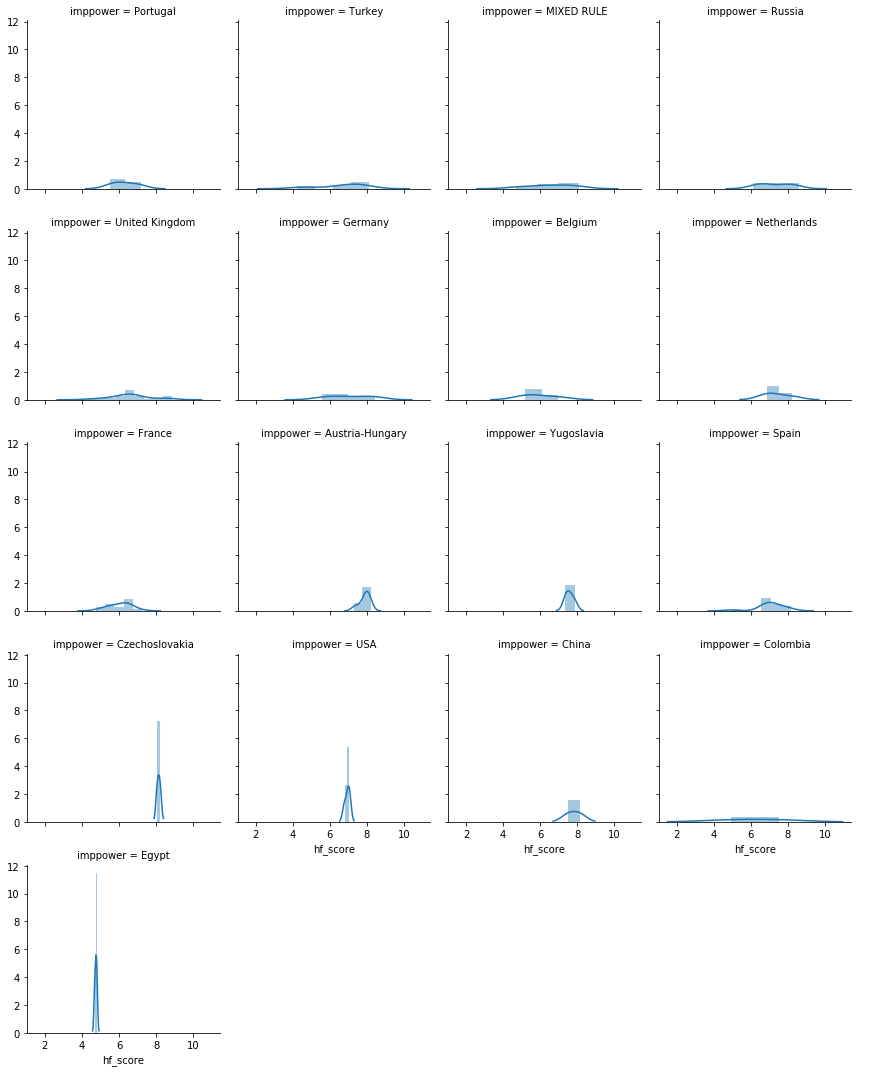

In [61]:
g = sns.FacetGrid(multiple_colonies_df, col="imppower", col_wrap=4)
g = (g.map(sns.distplot,'hf_score').add_legend())

### Does freedom for a country vary depending on the colonizer? <br> Does the freedom vary for different colonies colonialized by the same country? <br> Does the number of colonies colonized by country affect the freedom of the colonies?
- Countries ordered by number of colonies (left: least colonies, right: most colonies)

[Text(0, 0, 'China'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Czechoslovakia'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Egypt'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Austria-Hungary'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Turkey'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'France'),
 Text(0, 0, 'United Kingdom')]

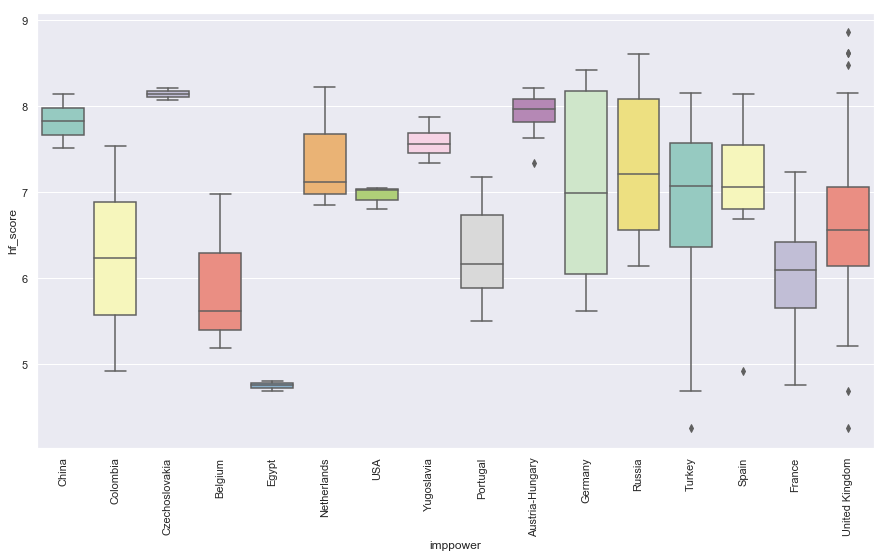

In [165]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="imppower", y="hf_score", data=multiple_colonies_df, palette="Set3", order=multiple_colonies)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

- Countries colonized by Belgium, France, Egypt have relatively lower freedom than other countries that were colonized
- Majority of the countries colonized by Russia have more freedom than majority of British colonies
- Number of colonies does not affect the freedom of the colonies

### Outlier countries by colonizer

##### Austria-Hungary
- Negative Outlier: Bosnia and Herzegovina

##### Turkey
- Negative Outlier: Iraq

##### Spain
- Negative Outlier: Venezuela

##### United Kingdom
- Positive Outliers: New Zealand, Canada, Australia
- Negative Outliers: Iraq, Yemen, Rep.

[Text(0, 0, 'Caucasus & Central Asia'),
 Text(0, 0, 'Eastern Europe'),
 Text(0, 0, 'Western Europe')]

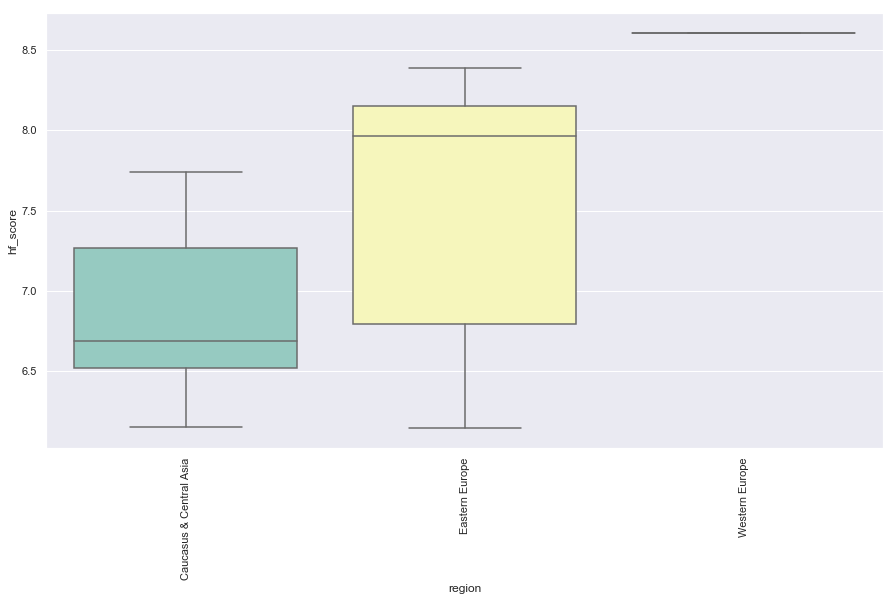

In [127]:
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="region", y="hf_score", data=multiple_colonies_df[multiple_colonies_df['imppower'] == 'Russia'], palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


[Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Eastern Europe'),
 Text(0, 0, 'Caucasus & Central Asia'),
 Text(0, 0, 'Oceania'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'South Asia'),
 Text(0, 0, 'Latin America & the Caribbean'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Middle East & North Africa'),
 Text(0, 0, 'East Asia')]

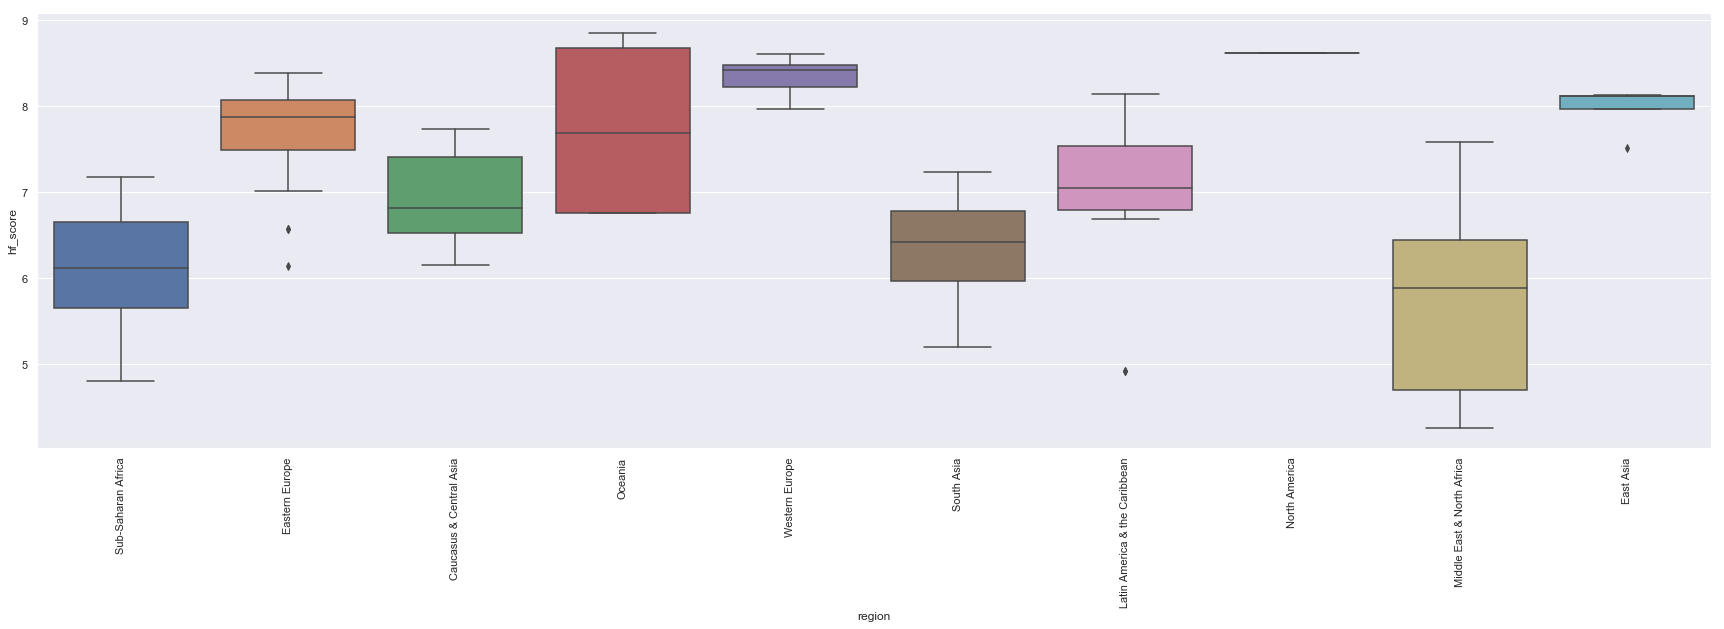

In [97]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.boxplot(x="region", y="hf_score", data=hf_mean_colonies_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

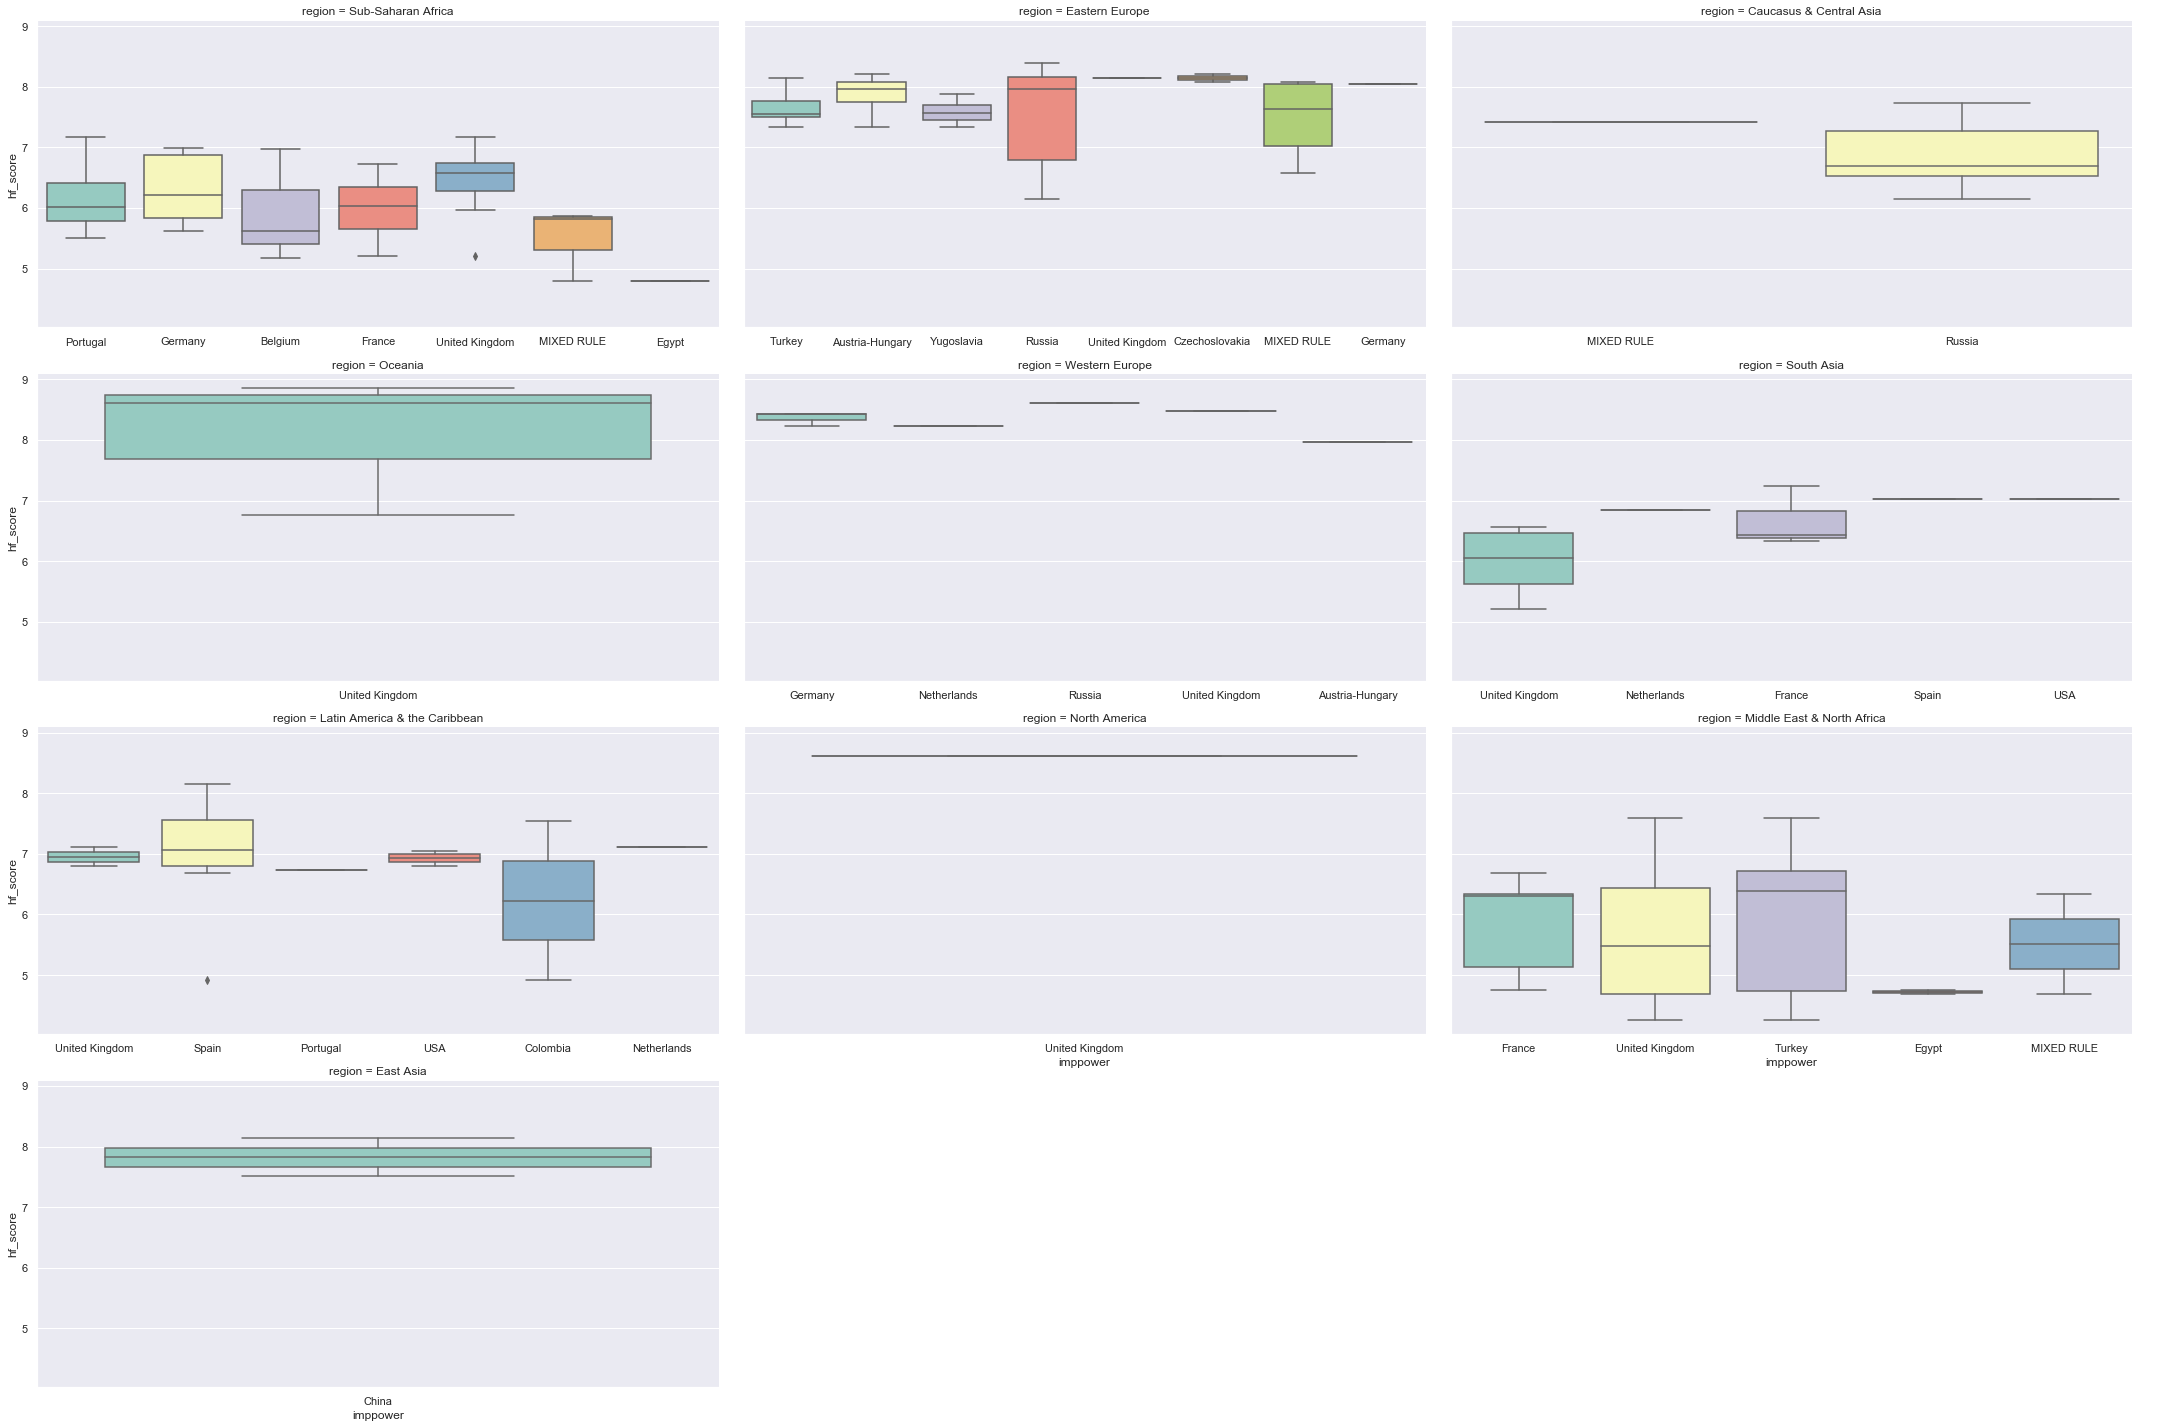

In [111]:
g = sns.FacetGrid(multiple_colonies_df, col="region", col_wrap=3, sharex=False, aspect=2, height=5)
g = (g.map(sns.boxplot,'imppower','hf_score',palette="Set3").add_legend())

- Compare hf score of colonizer to colonies
- Compare hf score of colonies to non colonies 
- Compare score of colonizers to non colonizers non colonies 
- Compare hf score of colonies ruled by more than one colonizer to those ruled by one colonizer
- Countries in the same region colonized by different countries
- Does distance from colonizer matter?

- Russian colonies have more freedom than British colonies

In [166]:
hf_mean_imppower_df = hf_mean_colonies_df.groupby(['imppower']).mean().reset_index()
hf_mean_imppower_df

,imppower,hf_score
0,Australia,6.758907
1,Austria-Hungary,7.894225
2,Belgium,5.924700
3,Bolivia,7.577527
4,Brazil,7.895528
5,China,7.824130
6,Colombia,6.229575
7,Czechoslovakia,8.140760
8,Denmark,8.122033
9,Egypt,4.749795


In [139]:
count_imppower_df = colonies_df['imppower'].value_counts().reset_index()
count_imppower_df

,index,imppower
0,United Kingdom,36
1,France,22
2,Spain,18
3,Turkey,17
4,Russia,16
5,MIXED RULE,12
6,Germany,10
7,Austria-Hungary,8
8,Portugal,5
9,Yugoslavia,4


In [142]:
sorted(list(set(count_imppower_df['index']) - set(hf_mean_imppower_df['imppower'])))

['Ethiopia', 'Italy']

In [147]:
list(hf_mean_colonies_df[hf_mean_colonies_df['imppower'] == 'Russia']['countries'])

['Armenia',
 'Azerbaijan',
 'Belarus',
 'Estonia',
 'Finland',
 'Georgia',
 'Hungary',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Lithuania',
 'Latvia',
 'Moldova',
 'Tajikistan',
 'Ukraine']

In [155]:
hf_mean_count_imppower_df = hf_mean_imppower_df.merge(count_imppower_df, left_on='imppower', right_on='index').drop('index',axis=1).rename({'imppower_y':'count', 'imppower_x':'imppower'}, axis='columns')
hf_mean_count_imppower_df

,imppower,hf_score,count
0,Australia,6.758907,1
1,Austria-Hungary,7.894225,8
2,Belgium,5.924700,3
3,Bolivia,7.577527,1
4,Brazil,7.895528,1
5,China,7.824130,2
6,Colombia,6.229575,2
7,Czechoslovakia,8.140760,2
8,Denmark,8.122033,1
9,Egypt,4.749795,4


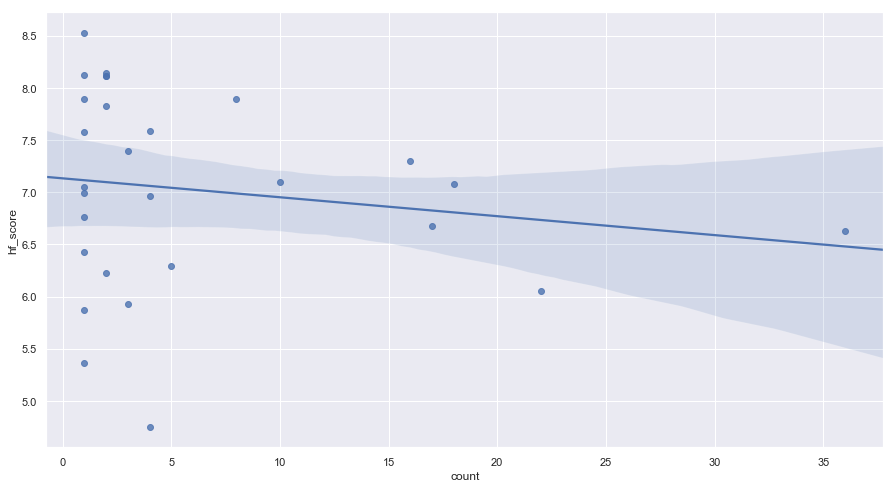

In [167]:
ax = sns.regplot(x="count", y="hf_score", data=hf_mean_count_imppower_df[hf_mean_count_imppower_df['imppower'] != 'MIXED RULE'])

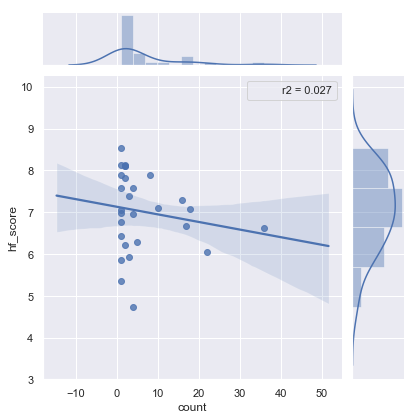

In [168]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(x="count", y="hf_score", data=hf_mean_count_imppower_df[hf_mean_count_imppower_df['imppower'] != 'MIXED RULE'], kind="reg", stat_func=r2)